In [45]:
import os

QM9_path = os.environ["DATA"] + "/00_datasets/DFT/QM9/QM9.smi"
ChEMBL_path = os.environ["DATA"] + "/00_datasets/ChEMBL25/complete_ChEMBL.smi"

ChEMBL_filtered_path = os.environ["DATA"] + "/00_datasets/ChEMBL25/ChEMBL_QED_below_QM9.smi"


In [12]:
def load_dataset(path):
    with open(path, "r") as f:
        smiles_list = [line.split()[0] for line in f.readlines()]
    return smiles_list

In [13]:
QM9_smi = load_dataset(QM9_path)
ChEMBL_smi = load_dataset(ChEMBL_path)

In [14]:
from evomol.evaluation import QEDEvaluationStrategy
import tqdm

s_qed = QEDEvaluationStrategy()

def calc_QED(smiles_list):
    QED_values = [s_qed.eval_smi(smi) for smi in tqdm.tqdm(smiles_list)]
    return QED_values

In [15]:
QM9_QED = calc_QED(QM9_smi)

100%|██████████████████████████████████████████████████████████| 133885/133885 [02:00<00:00, 1111.58it/s]


In [16]:
ChEMBL_QED = calc_QED(ChEMBL_smi)

100%|███████████████████████████████████████████████████████| 1817766/1817766 [1:08:43<00:00, 440.81it/s]


In [24]:
import numpy as np

data = {
    "dataset": np.concatenate([np.full(len(QM9_QED), "QM9"), np.full(len(ChEMBL_QED), "ChEMBL")]),
    "qed": QM9_QED + ChEMBL_QED
}

<AxesSubplot:xlabel='qed', ylabel='Count'>

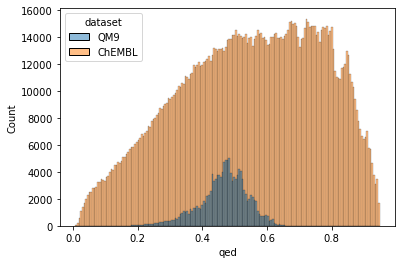

In [25]:
import seaborn as sns

sns.histplot(data=data, x="qed", hue="dataset")

In [26]:
np.max(ChEMBL_QED)

0.9483292586156477

In [29]:
ChEMBL_path[np.argmax(ChEMBL_QED)]

'N=C1SCC(=O)N1c1ncc(Cc2ccc(F)cc2)s1'

In [30]:
np.max(QM9_QED)

0.6687972090186459

In [31]:
QM9_smi[np.argmax(QM9_QED)]

'CCCNc1ccco1'

In [36]:
mask_ChEMBL_inf = np.array(ChEMBL_QED) < np.max(QM9_QED)

In [40]:
ChEMBL_filtered_smi, ChEMBL_filtered_QED = np.array(ChEMBL_path)[mask_ChEMBL_inf], np.array(ChEMBL_QED)[mask_ChEMBL_inf]

In [41]:
data["dataset"] = np.concatenate([data["dataset"], np.full(len(ChEMBL_filtered_smi), "ChEMBL_filtered")])
data["qed"] = np.concatenate([data["qed"], ChEMBL_filtered_QED])

<AxesSubplot:xlabel='qed', ylabel='Count'>

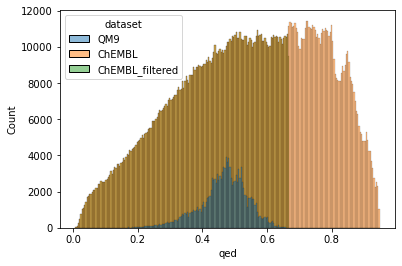

In [42]:
sns.histplot(data=data, x="qed", hue="dataset")

In [46]:
import csv

with open(ChEMBL_filtered_path, "w") as f:
    writer = csv.writer(f)
    rows = [[smi] for smi in ChEMBL_filtered_smi]
    writer.writerows(rows)

In [47]:
len(ChEMBL_QED)

1817766

In [48]:
len(ChEMBL_filtered_QED)

1203264

In [49]:
np.mean(ChEMBL_QED)

0.5453965437023535

In [50]:
np.mean(ChEMBL_filtered_QED)

0.42353576209126265

In [51]:
np.mean(QM9_QED)

0.4652669356225954